In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from numba.np.arraymath import array_cumsum
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

titanic_ds = sns.load_dataset('titanic')
colors = ['red' if x==0 else 'blue' for x in [0, 1]]

titanic_ds.drop(labels=['embark_town', 'embarked', 'deck', 'class', 'alive'], axis=1, inplace=True)

titanic_ds['sex'] = titanic_ds['sex'].map({'male': 0, 'female': 1})
titanic_ds['who'] = titanic_ds['who'].map({'man': 0, 'woman': 1, 'child': 2}) 

titanic_ds.dropna(inplace=True)

X, y = titanic_ds.drop('survived', axis=1), titanic_ds['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=60)

X_train

,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
310,1,1,24.0,0,0,83.1583,1,False,True
122,2,0,32.5,1,0,30.0708,0,True,False
707,1,0,42.0,0,0,26.2875,0,True,True
37,3,0,21.0,0,0,8.0500,0,True,True
880,2,1,25.0,0,1,26.0000,1,False,False
...,...,...,...,...,...,...,...,...,...
501,3,1,21.0,0,0,7.7500,1,False,True
494,3,0,21.0,0,0,8.0500,0,True,True
731,3,0,11.0,0,0,18.7875,2,False,True
85,3,1,33.0,3,0,15.8500,1,False,False


In [57]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.8465116279069768

In [58]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       129
           1       0.78      0.72      0.75        86

    accuracy                           0.80       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215



[Text(0.5756152849740933, 0.9736842105263158, 'fare <= 0.5\ngini = 0.483\nsamples = 499\nvalue = [295, 204]\nclass = Died'),
 Text(0.3591321243523316, 0.9210526315789473, 'parch <= 26.269\ngini = 0.301\nsamples = 287\nvalue = [234, 53]\nclass = Died'),
 Text(0.22733160621761658, 0.868421052631579, 'sex <= 32.5\ngini = 0.203\nsamples = 209\nvalue = [185, 24]\nclass = Died'),
 Text(0.1489637305699482, 0.8157894736842105, 'sex <= 26.5\ngini = 0.248\nsamples = 131\nvalue = [112, 19]\nclass = Died'),
 Text(0.08031088082901554, 0.7631578947368421, 'survived <= 2.5\ngini = 0.19\nsamples = 94\nvalue = [84, 10]\nclass = Died'),
 Text(0.06994818652849741, 0.7105263157894737, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = Died'),
 Text(0.09067357512953368, 0.7105263157894737, 'sex <= 20.25\ngini = 0.221\nsamples = 79\nvalue = [69, 10]\nclass = Died'),
 Text(0.04145077720207254, 0.6578947368421053, 'sex <= 19.5\ngini = 0.298\nsamples = 33\nvalue = [27, 6]\nclass = Died'),
 Text(0.020725388601

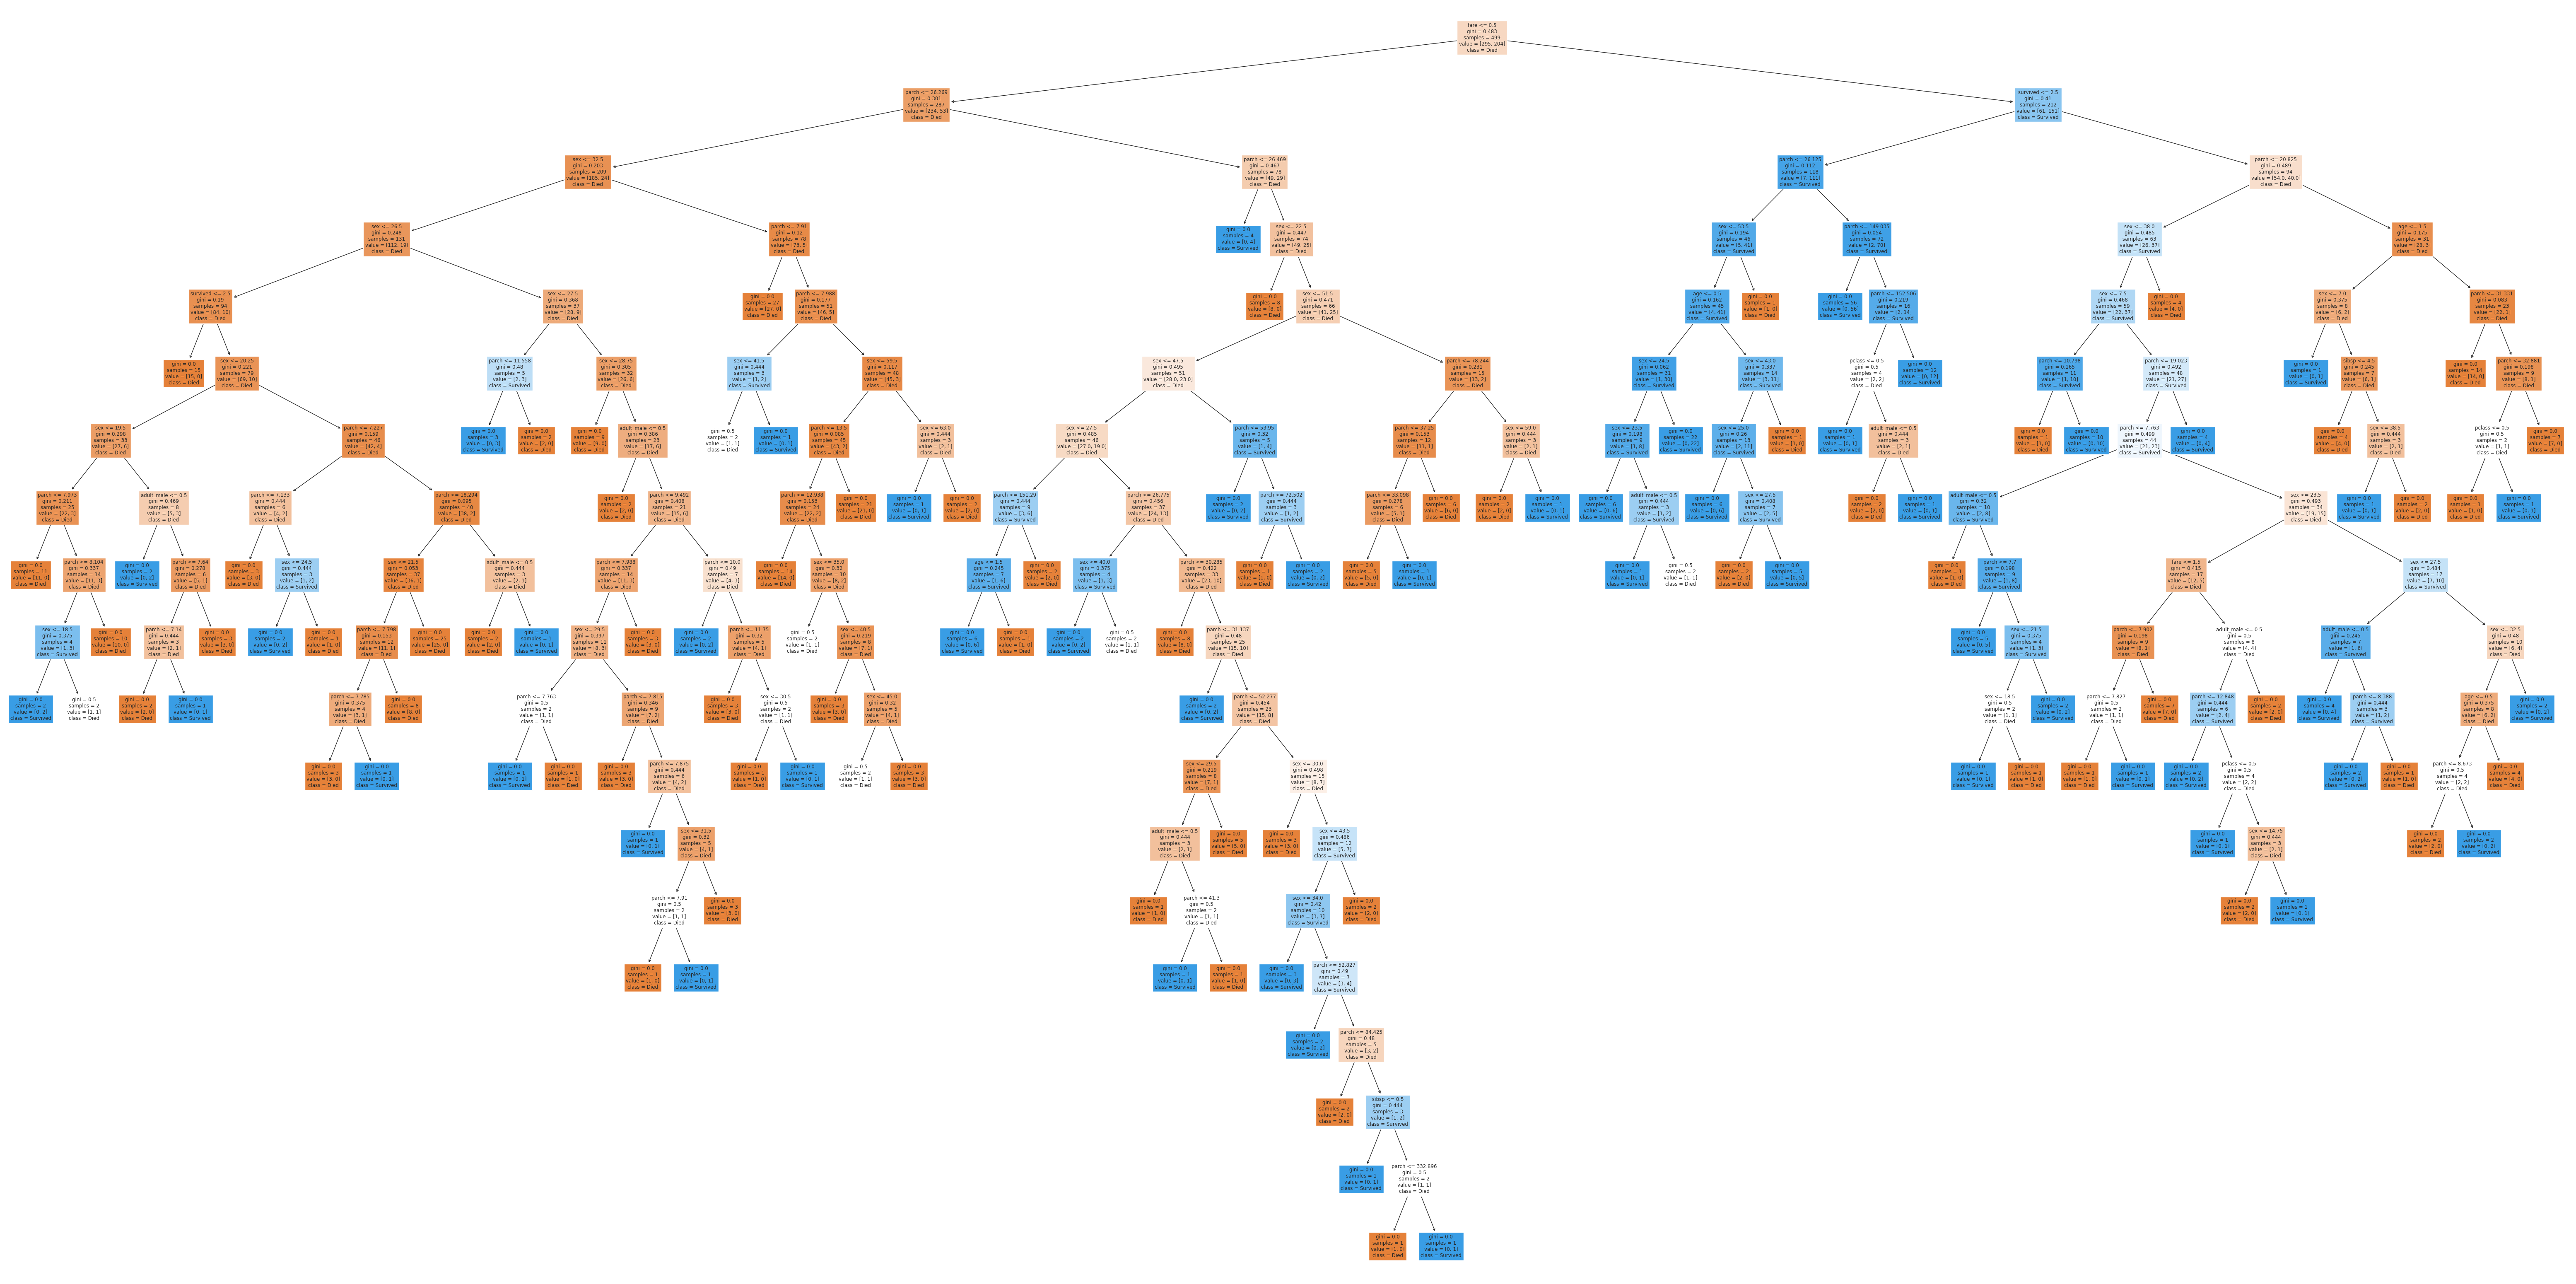

In [59]:
titanic_ds.head()
fn = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'adult_male', 'alone']
plt.figure(figsize=(80, 40))
cn = ['Died', 'Survived']

plot_tree(dtree, filled=True, feature_names=fn, class_names=cn)

In [62]:
avgMale = {
    'pclass': [0],
    'sex': [0],
    'age': [20],
    'sibsp': [0],
    'parch': [0],
    'fare': [25],
    'who': [0],
    'adult_male': [True],
    'alone': [True]
}

avgFemale = {
    'pclass': [0],
    'sex': [1],
    'age': [20],
    'sibsp': [0],
    'parch': [0],
    'fare': [25],
    'who': [1],
    'adult_male': [False],
    'alone': [True]
}

mySelfTest = {
    'pclass': [0],
    'sex': [0],
    'age': [19],
    'sibsp': [0],
    'parch': [0],
    'fare': [25],
    'who': [0],
    'adult_male': [True],
    'alone': [True]
}

avgMale = pd.DataFrame(avgMale)
avgFemale = pd.DataFrame(avgFemale)
mySelfTest = pd.DataFrame(mySelfTest)
print(f'Do you survive the Titanic?\nSubject - Talon (Survived = 0, Died = 1): {dtree.predict(avgMale)}\nSubject - Mikhaela (Survived = 0, Died = 1): {dtree.predict(avgFemale)}\nSubject - Alejandro (Survived = 0, Died = 1): {dtree.predict(mySelfTest)}')

Do you survive the Titanic?
Subject - Talon (Survived = 0, Died = 1): [0]
Subject - Mikhaela (Survived = 0, Died = 1): [1]
Subject - Alejandro (Survived = 0, Died = 1): [0]
